
<CENTER>
<p><font size="5">  Queuing theory: from Markov chains to multiserver systems</font></p>
<p><font size="5">  Python Labs </p>
<p><font size="5">  Week I - Part II: simulation of random variables</p>
</CENTER>

----------------------------

As mentioned in the introduction of the labs, part 2 of the labs is intended to learners who want to get further insight into the subjects studied in the MOOC. Although you will not get additional credits for them, depending on the time you can afford for the MOOC, we invite you to consider them and contribute to the related discussions on the forum. 

# Week 1: lab, part 2

In this second part of the lab, we are going to emphasize some aspects of simulation of exponential and Poisson random variables. 

In the **first exercice** we consider the squared [coefficient of variation](https://en.wikipedia.org/wiki/Coefficient_of_variation) of exponential distributions. The **second exercice** is devoted to plotting histograms and further properties of the exponential distribution. The **third exercice** introduces the connection between exponential and  Poisson distributions. 

------------------


## I - Squared coefficient of variation of exponential random variables


We will use the [*Statistics* sublibrary of *Scipy*](https://docs.scipy.org/doc/scipy/reference/stats.html) to draw samples of an $Exp(\lambda)$ distribution.

**1)**
Calculate the mean $\mu$, variance $\sigma^2$ and squared [coefficient of variation](https://en.wikipedia.org/wiki/Coefficient_of_variation)  $cv^2=\sigma^2/\mu^2$ of an $Exp(\lambda)$ distribution. Draw $N=10^6$ samples of an $Exp(\lambda)$ distribution, for $\lambda=0.5$, 1 and 2. Compute the sample estimates of $\mu$, $\sigma^2$ and $cv^2$. What do you notice? 

**2)**
Generate $N$ samples of a uniform distribution on $[0,1]$. Check that this data could very unlikely represent realizations of an exponential random variable.

In [1]:
%matplotlib inline              
from pylab import *   

### **Answer to question I-1** 

In [2]:
from scipy.stats import expon

N  = 10**6
λs = (.5,1.0,2.0)
for λ in λs:
    ########################################
    # Supply scale parameter for function expon.rvs 
    # for documenation of expon.rvs , see doc at 
    # https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.expon.html
    scale = 1 / λ
    data  = expon.rvs(scale=scale, size=N)   # simulation of a size N sample
    ########################################
    μ      = mean(data)
    σ2     = var(data)
    ########################################
    # Supply the expression coefficient of variation herein below
    cv2   = σ2/μ/μ
    ########################################
    print("\u03BB={0}: m={1:1.2f}, \u03C3\u00B2={2:1.2f}, cv\u00B2={3:1.2f}"
          .format(λ,μ,σ2,cv2))  #\u... for unicode caracters
    # note : unicode tables can be found at https://unicode-table.com/en/

#----------
V1 = cv2
V2 = scale

λ=0.5: m=2.00, σ²=4.00, cv²=1.00
λ=1.0: m=1.00, σ²=1.01, cv²=1.00
λ=2.0: m=0.50, σ²=0.25, cv²=1.00


### **Answer to question I-2** 

In [3]:
N = 10**6
########################################
# generate a sample of IID uniformly distributed 
# random variables over [0,1]
data = rand(N)  
########################################

μ      = mean(data)
σ2     = var(data)
cv2  = σ2/μ**2
print('Uniform distribution over [0,1]')
print("m={0:1.2f}, \u03C3\u00B2={1:1.2f}, cv\u00B2={2:1.2f}"
          .format(μ,σ2,cv2))

#--------
V3 = cv2

Uniform distribution over [0,1]
m=0.50, σ²=0.08, cv²=0.33


## II - Histograms and further properties of the exponential distribution

### 1 -  Simulation of an exponential distribution

> - **1)** Write a function that draws samples from an exponential distribution, with arguments $\lambda$ and the sample size.
> - **2)** Generate $N=10^6$ samples of an exponential distribution $Exp(\lambda)$ with parameter $\lambda=0.5$, and plot the corresponding histogram, together with the probability density function (**pdf**) of the distribution. Check that the histogram matches well the pdf. 

### 2 - Memoryless property of the exponential distribution

> - **1)** Calculate the pdf of an $Exp(\lambda)$ random variable $X$ given that $X\geq x_0$ and check that it is given by the pdf $p_{_{X\geq x_0}}(x)=\lambda e^{-\lambda (x-x_0)}{\bf 1}_{[x_0,\infty[}(x)$. The exponential distribution is memoryless, what does that mean?
> - **2)** Check this result for the samples drawn in section **II-1** and $x_0=2$, by comparing the theoretical $p_{_{X\geq x_0}}(x)$ and the conditional histogram.

### 3 - Exponentially distributed delays between independent events

We assume that $N$ events (for instance arrivals of clients at a counter) are observed during a period of time $T$. Events are assumed to be independent with uniform distribution  over the elapsed time interval.

> - **1)**  Calculate the distribution of events inter-arrivals. To this end, calculate the probability that no event occurs during a fixed time interval $t$. Then, noting $\lambda=N/T$, show that the distribution of events inter-arrivals tends to be $Exp(\lambda)$ as $N$ and $T$ go to infinity, with a constant ratio  $\lambda$. 
> - **2)** To check this result, plot the histogram of events inter-arrivals for $N=10^5$ events over a duration $T=5.10^3$ hours and check that they are exponentially distributed by using a [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot).

--------------------

### **Answer to question II-1-1**

In [4]:
def exp_samples(λ=1,n=1):
    """
    generates a numpy array of n samples distributed according to
    an exponential distribution with parameter λ
    """
    return (-1/λ)*log(rand(n))

### **Answer to question II-1-2**

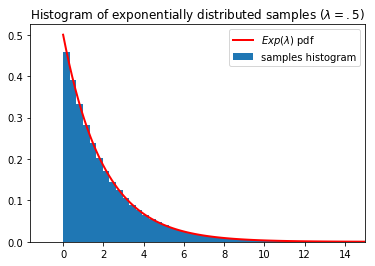

In [5]:
λ       = .5
n       = 10**6
samples = exp_samples(λ=λ,n=n)
hist(samples,bins=100,density=True,label='samples histogram');
x = linspace(0,15,100)
plot(x,λ*exp(-λ*x),linewidth=2,color='r',
                 label=r'$Exp(\lambda)$ pdf')
"""
# equivalently, we can use the pdf supplied in Scipy.stats:
from scipy.stats import expon
plot(x,expon.pdf(x,scale=1./λ),linewidth=2,color='r',
                 label=r'$Exp(\lambda)$ pdf, with $\lambda=.5$')
"""

axis(xmax=15)
title(r'Histogram of exponentially distributed samples ($\lambda=.5$)')
legend();

### Answer to questions II-2-1 and II-2-2

Let $p_{_{X\geq x_0}}(x)$ denote the pdf of an $Exp(\lambda)$ random variable $X$ given that $X> x_0$. We assume that $x \geq x_0$ since if $x < x_0$ the the conditional pdf is obviously equal to 0.

Let $P(A|B)=\dfrac{P(A\cap B)}{P(B)}$ denote the probability of $A$ given $B$, the cumulative function of $X$ given that $X\geq x_0$ is 

$$
\begin{array}{ll}
F_{_{X\geq x_0}}(x) &= P(X\leq x\; |\; X\geq x_0) = 1-P(X>x\; |\; X \geq x_0) \\
&= 1 - \dfrac{P(X>x,X\geq x_0)}{P(X\geq x_0)} = 1 - \dfrac{P(X\geq x)}{P(X\geq x_0)}  \\
& = 1 - \dfrac{e^{-\lambda x}}{e^{-\lambda x_0}} = (1-e^{-\lambda(x-x_0)}){\bf 1}_{[x_0,\infty[}(x)
\end{array}
$$

<!--Note that the first equality in relation $P(X>x,X\geq x_0)=P(X\geq x,X\geq x_0)$ $=P(X\geq\max(x,x_0))$ is valid because $X$ is an absolutly continuous random variable, that is, its distribution has no mass point. -->

Thus $p_{_{X\geq x_0}}(x)=\dfrac{d}{dx}\left[
(1-e^{-\lambda(x-x_0)}){\bf 1}_{[x_0,\infty[}(x)\right] = \lambda e^{-\lambda(x-x_0)}){\bf 1}_{[x_0,\infty[}(x)$. 

So, given that $X\geq x_0$, the distribution of $X-x_0$ follows an $Exp(\lambda)$ distribution. If $X$ denotes the instant some event occurs, it appears that whatsoever the elapsed time $x_0$, if the event did not occur yiet, the remaining time before it still follows an $Exp(\lambda)$ distribution and is thus independent on $x_0$. Hence the memoryless property of the exponential distribution. 

We check that histogram fits well the pdf $p_{_{X\geq x_0}}$.

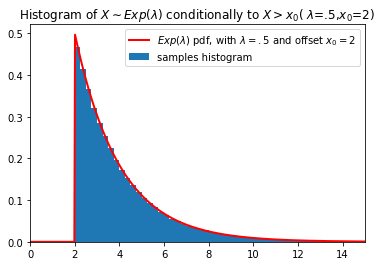

In [6]:
λ       = .5
n       = 10**6
samples = exp_samples(λ=λ,n=n)
x0      = 2
# We only keep samples x obtained given that x>x0:
sensored_samples = samples[samples>2]
hist(sensored_samples,bins=100,density=True,label='samples histogram');
x = linspace(0,15,500)
# We check that the pdf of the exponential distribution with offset x0
# fits well the periodogram of sensored sample
plot(x,λ*exp(-λ*(x-x0))*(x>=x0),linewidth=2,color='r',
     label=r'$Exp(\lambda)$ pdf, with $\lambda=.5$ and offset $x_0=2$')
title(('Histogram of $X\sim Exp(\lambda)$ conditionally to $X>x_0$'
        +'( $\lambda$=.5,$x_0$=2)'))
axis(xmin=0,xmax=15)
legend();

### **Answer to question II-3-1**

Let $X$ denote the elapsed time between two events. If $X>t$, that is, no event occurs during some delay $t$, the $N$ events must occur during a period of time of $T-t$, which is true with probability 

$$
P(X>t)=\left(\dfrac{T-t}{T}\right)^N=(1-t/T)^N=\exp(N\log(1-t/T)).
$$

As $T\rightarrow\infty$, $\exp(N\log(1-t/T))\approx \exp(-Nt/T)=\exp(-\lambda t)$, showing thus that $X$ becomes exponentially distributed.

### **Answer to question II-3-2**

Histogram and QQ-plot figure confirm that inter-arrivals are exponentially distributed with parameter $\lambda=N/T$.

mean=0.050 (approx. 20 event per hour)
var=0.003


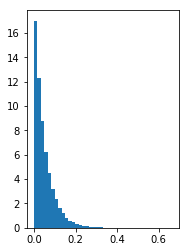

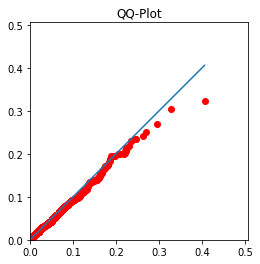

In [7]:
N = 10**5     # number of events
T = 5*10**3   # duration
x = sort(T*rand(N)) # instants of events 
y = x[1:N]-x[:N-1]  # delay between events

subplot(121)
hist(y,bins=40,density=True,label='Data histogram');

#########################################
# Supply an estimate of lambda, assuming that 
# samples of data y follow an Exp(λ) distribution 
λ = 20
#########################################
print('mean={0:1.3f} (approx. {1} event per hour)\nvar={2:1.3f}'
      .format(1./λ,int(round(λ)),var(y)))
t = linspace(0,max(y),100)
figure(figsize=(10., 4.))
plot(t,λ*exp(-λ*t),linewidth=2,color='r',
     label='Exponential pdf')
legend()
title('pdf of inter-arrivals')

#QQ-plot
subplot(122,aspect=1)
N2 = 1000      # sample size for QQ-plot
y2 = sort(y[:N2])
z  = sort((-1./λ)*log(rand(N2)))
t = linspace(0,max(y2[-1],z[-1]),2)
for k in range(N2):
    plot(y2[k],z[k],'or')
plot(t,t)
axis(xmin=0,xmax=t[-1]+.1,ymin=0,ymax=t[-1]+.1)
title('QQ-Plot')

#--------------
V4 = λ

# III - The Poisson distribution

The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is a discrete distribution $X$ with probabilities that depend on a parameter $\lambda$ and are in the form of

$$
P(X=k)=\dfrac{\lambda^k}{k!}e^{-\lambda},\quad{\text for }\;  k=0,1,2,\ldots
$$

We denote by $\mathcal{P}(\lambda)$ the Poisson distribution with parameter $\lambda$.

**1)** To make clear why the Poisson distribution naturally arises in counting random events, consider the instants of arrival generated  in the simulation of section **II-3-2**, where we found that the inter-arrivals were exponentially distributed with intensity $\lambda=N/T=20$ events per hour. Check that the number of events per hour is well described by a Poisson distribution (take $N=10^5$). To this end, plot the histogram of the number of events per day and check that it fits well a $\mathcal{P}(\lambda)$ distribution, with $\lambda=N/T$.

**2)** In section **I**, we have seen how, in some situations, samples of a distribution with a given pdf can be obtained from samples uniformly distributed over the interval $[0,1]$. In the same way, samples from discrete distributions can be obtained via sampling of a uniform distribution over $[0,1]$. Letting $X$ a discrete random variable with values in a countable set (finite $\{x_i; i=0,1,\ldots, N\}$, or infinite $\{x_i; i=0,1,\ldots\}$), and $P(X=x_i)=p_i$. Then, letting $u$ denote a sample from an $\mathcal{U}_{[0,1]}$ distribution, the value $x_k$ such that that $X = x_k$ if

$$
\sum_{i=0}^{k-1}p_i<u\leq \sum_{i=0}^{k}p_i
$$

is obtained with probability $p_k$.

> - **1 - ** Prove the above statement.
> - **2 - ** From this result, draw $N=10^5$ samples from a Poisson distribution with parameter $\lambda= 20$ and check that the corresponding histogram fits well a Poisson distribution.


**3)**
Alternatively, use the *statistics* sublibrary of *Scipy* to draw samples from the Poisson distribution, with $\lambda= 20$. Check from empirical estimates, computed from $N=10^5$ samples, that $\mathbb{E}[X]=\sigma_X^2=\lambda$ for the Poisson distribution. 


### **Answer to question III-1**

In [8]:
# Function Poisson_dist generates the first n probabilities 
# of a Poisson distribution with parameter λ
# 2 implementations are proposed here
# argument n represents the number of probabilities considered

# 2) Using function scipy.stats.poisson:
from scipy.stats import poisson
def Poisson_dist(n=ceil(2*λ),λ=λ):
    return poisson.pmf(arange(n),λ)


In [9]:
Poisson_dist(n=20)

array([2.06115362e-09, 4.12230724e-08, 4.12230724e-07, 2.74820483e-06,
       1.37410241e-05, 5.49640966e-05, 1.83213655e-04, 5.23467587e-04,
       1.30866897e-03, 2.90815326e-03, 5.81630652e-03, 1.05751028e-02,
       1.76251713e-02, 2.71156481e-02, 3.87366401e-02, 5.16488535e-02,
       6.45610669e-02, 7.59541964e-02, 8.43935515e-02, 8.88353174e-02])

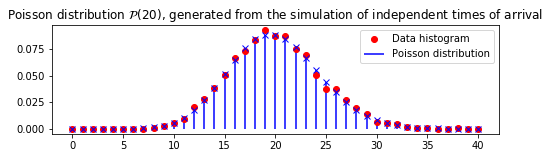

In [10]:
# Simulation of the instants of events (as in II-3-2)
N = 10**5            # number of events
T = 5*10**3          # duration
λ = N/T
t = sort(T*rand(N))  # instants of invents

# Histogram
# Number of events occuring in successive times intervals [0,1[,[1,2[,...:
nb_events = array([sum(floor(t)==k) for k in range(int(t[-1]))])
# Number of occurences of 0,1,2,... events among the 1 hour time intervals:
hist_      = array([sum(nb_events==k) for k in range(max(nb_events)+1)])
#####################################
# Normalize the histogram of data
hist_      = hist_ / T
#####################################

figure(figsize=(8., 2.))
plot(0, hist_[0],'ro',markersize=6,label='Data histogram')
for k,v in enumerate(hist_[1:]):
    plot(k+1, v,'ro',markersize=6)

# Poisson distribution
Poisson = Poisson_dist(n=len(hist_))
x       = range(len(hist_))
vlines(x,0,Poisson,colors='b',label="Poisson distribution")
plot(x, Poisson,'bx')

legend(loc='upper right')
title(('Poisson distribution $\mathcal{P}$(%d),'
       +' generated from the simulation of independent times of arrival')
       %λ)

#------------------
# test variable V_3_1 represents histogram mean
# and should be close to N/T=20
V5 = sum(hist_*range(len(hist_)))

### **Answer to question III-2-1**

Since for $0\leq a\leq b \leq 1$ we have $P(u\in ]a,b])=b-a$,  the probability that $\sum_{i=0}^{k-1}p_i<u\leq \sum_{i=0}^{k}p_i$ is $(\sum_{i=0}^{k}p_i)-(\sum_{i=0}^{k-1}p_i)=p_k$. Thus the value $x_k$ is obtained with probability $p_k$, which corresponds to the distribution of $X$.

### **Answer to question III-2-2**

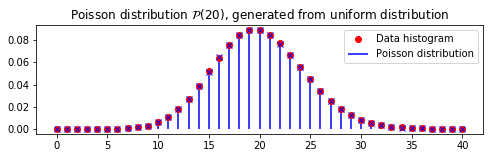

In [11]:
N        = 10**6 # number of samples
λ        = 20
nb_proba = 41    # number of probabilities accounted for

# Histogram
Poisson          = Poisson_dist(n=nb_proba)
cum_distribution = cumsum(Poisson) # cumulated Poisson distribution
u                = sort(rand(N))
hist_            = zeros(nb_proba) # histogram initialization
index            = 0               # index position in vector u
for n in range(nb_proba):
    while (index<N) and (u[index]<cum_distribution[n]) :  
        hist_[n]  +=1.  # counting how many samples of u fall
        index     +=1   # inside cumulated distribution intervals.
hist_ = hist_/index     # Histogram normalization.

figure(figsize=(8., 2.))
plot(0, hist_[0],'ro',markersize=6,label='Data histogram')
for k,v in enumerate(hist_[1:]):
    plot(k+1, v,'ro',markersize=6)

# Poisson distribution
Poisson  = Poisson_dist(n=nb_proba)
x        = range(nb_proba)
vlines(x,0,Poisson,colors='b',label="Poisson distribution")
plot(x, Poisson,'bx')
legend(loc='upper right')
title(('Poisson distribution $\mathcal{P}$(%d),'
       +' generated from uniform distribution')%λ);

### **Answer to question III-3**

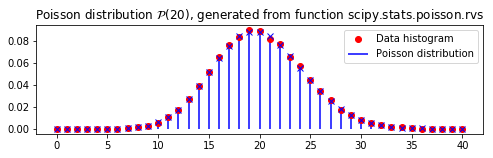

In [12]:
from scipy.stats import poisson

λ        = 20
N        = 10**5
nb_proba = 41    

# Histogram generated from function scipy.stats.poisson.rvs
#############################################
# Supply parameter mu for function poisson.rvs
# see the following ling for help about poisson.rvs:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html
c      = 20
sample = poisson.rvs(mu=c, size=N)
#############################################
hist_  = array([sum(sample==k) for k in range(nb_proba)]) # Histogram
hist_  = hist_/sum(hist_)         # Histogram normalization
figure(figsize=(8., 2.))
plot(0, hist_[0],'ro',markersize=6,label='Data histogram')
for k,v in enumerate(hist_[1:]):
    plot(k+1, v,'ro',markersize=6)

# Poisson distribution
Poisson  = Poisson_dist(n=nb_proba)
x        = range(nb_proba)
vlines(x,0,Poisson,colors='b',label="Poisson distribution")
plot(x, Poisson,'bx')

legend(loc='upper right')
title(('Poisson distribution $\mathcal{P}$(%d),'
       +' generated from function scipy.stats.poisson.rvs')%λ)
#---------
V6 = c

In [13]:
range(len(hist_))

range(0, 41)

Estimated mean and variance of the Poisson distribution: we check that we get approximatly 
$\mathbb{E}[X]=\sigma_X^2=\lambda$ from simulation.

In [14]:
####################################
# compute mean and variance of sample vector 
# calculated in the code cell above
μ_sample  = sum(hist_*range(len(hist_)))
σ2_sample = sum(hist_*range(len(hist_))*range(len(hist_))) - sum(hist_*range(len(hist_)))**2
####################################
print(("\u03BB = {0}\nestimated mean = {1:1.2f}\n"
       +"estimated var = {2:1.2f}")
      .format(λ,μ_sample, σ2_sample))

#------------------------
V7 = μ_sample
V8 = σ2_sample

λ = 20
estimated mean = 19.99
estimated var = 19.89


# Conclusion

In this Lab, we have considered several ways of drawing independant samples distributed according to an absolutly continuous or a discrete distribution:

> - Simulation of samples from samples of uniform distributions;
> - Simulation of phenomena that generate samples distributed according to the target distribution;
> - Simulation from the random generator of Scipy.

We have devoted particular attention to the exponential and Poisson distributions that are of particular interest in the modelling of queues. We also considered the mean and variance of these distributions and their calculation from observed samples. From next week, you will use these distributions to simulate queues.

# Your answers for this notebook

In [15]:
print("--------------------------------------------\n"
      +"VALIDITY OF RESULTS SUPPLIED FOR WEEK I - Part II:\n"
      +"--------------------------------------------")
results  = dict()
for k in range(1,9):
    results["V"+str(k)] = "NO"
try: 
    if abs(V1-1.)<.1:    results["V1"] =  "OK"
except: pass
try: 
    if abs(V2-.5)<.01:   results["V2"] =  "OK"
except: pass
try: 
    if abs(V3-.33)<.1:   results["V3"] =  "OK"
except: pass
try: 
    if abs(V4-20)<.1:    results["V4"] =  "OK"
except: pass
try: 
    if abs(V5-20)<.005:  results["V5"] =  "OK"
except: pass
try: 
    if abs(V6-20)<.0001: results["V6"] =  "OK"
except: pass
try: 
    if abs(V7-20)<.5:    results["V7"] =  "OK"
except: pass
try: 
    if abs(V8-20)<.5:    results["V8"] =  "OK"
except: pass

for key,val in results.items():
    print(key,': ',val)

--------------------------------------------
VALIDITY OF RESULTS SUPPLIED FOR WEEK I - Part II:
--------------------------------------------
V1 :  OK
V2 :  OK
V3 :  OK
V4 :  OK
V5 :  OK
V6 :  OK
V7 :  OK
V8 :  OK
